In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("H:\\sliv\\dataleak_messages.csv", sep=';')

In [3]:
true_indx = pd.read_csv("true_indexes_no_lists.csv", sep=';')


In [4]:
# есть артефакты, ставим None, если id сообщения не является числом
df.message_id = df.message_id.apply(lambda x: x if x.isdigit() else None)

In [5]:
#удаляем пустые ячейки
df.dropna(inplace=True)

In [6]:
#приводим id сообщения к численному типу 
df.message_id = df.message_id.astype('int')

In [7]:
# сортируем
df_sorted = df.sort_values(by='message_id').reset_index(drop=True)

In [8]:
true_indx.true_index = true_indx.true_index.astype('int')
lst_ti = list(true_indx['true_index'])

In [9]:
df_sorted['ti'] = df_sorted.message_id.apply(lambda x: True if x in lst_ti else False)

In [10]:
df_sorted.head()

,message_id,message_date,message_text,ti
0,4,2017-11-19 07:53:26+00:00,Американская сеть розничной торговли одеждой F...,False
1,5,2017-11-19 11:11:03+00:00,"Утекла база данных из 1.8 миллиарда сообщений,...",False
2,6,2017-11-19 12:23:09+00:00,Злоумышленники получили информацию с компьютер...,False
3,7,2017-11-19 12:45:26+00:00,Небольшой обзор крайне полезного и недорогого ...,False
4,8,2017-11-20 09:54:25+00:00,Добрый день. Сегодня мы принесли вам 2 утечки ...,False


In [11]:
df_sorted = df_sorted[df_sorted['ti']]

In [12]:
df_sorted.drop(columns=['ti'], axis=0, inplace=True)

In [13]:
#добавим развернутые сообщения
fields = 'имя, адрес, телефон, дата и сумма заказа'
new_columns = pd.DataFrame({'message_id':[9000, 9001, 9002, 9003, 9004, 9005, 9006, 9007, 9008, 9009, 9010,9011], 
                            'message_date': ['06.03.2023 15:36:26+00:00', '06.03.2023 15:36:26+00:00', '06.03.2023 15:36:26+00:00', 
                                             '24.04.2022 15:36:26+00:00', '24.04.2022 15:36:26+00:00', '24.04.2022 15:36:26+00:00', 
                                             '24.04.2022 15:36:26+00:00', '24.04.2022 15:36:26+00:00', '02.01.2022 15:36:26+00:00', 
                                             '02.01.2022 15:36:26+00:00', '02.01.2022 15:36:26+00:00', '02.01.2022 15:36:26+00:00'], 
                            
                            'message_text' : ['Такси __willway.ru__ - 7,788 строк: ФИО, адрес эл. почты, телефон, хешированный пароль. Актуальность 07.03.2023.', 
                                             'Бургерная __farshburger.ru__/__profarsh.ru__ - 14,209 строк: имя, адрес эл. почты, телефон, __IP__-адрес, комментарий к заказу. Актуальность 07.03.2023.', 
                                             'Образовательный форум для поступающих в ВУЗы __propostuplenie.ru__ - 521,353 строки: имя/фамилия, адрес эл. почты, телефон, хешированный пароль. Актуальность 06.03.2023.', 
                                             '1️⃣ __buffet24.ru__ - доставка в Красноярске: 81,984 строки. Актуальность: 07.02.2022' + fields, 
                                             '2️⃣ __maxxi-cafe.ru__ - доставка в Курске: 61,574 строки. Актуальность: 24.04.2022\r\n\r\n' + fields, 
                                             '3️⃣ __roll46.ru__ - доставка в Курске: 2,047 строк. Актуальность: 15.04.2022\r\n\r\n' + fields, 
                                             '4️⃣ __tochkaedy46.ru__ - доставка в Курске: 575 строк. Актуальность: 23.04.2022' + fields, 
                                             '5️⃣ __r-sushi.ru__ - доставка в Санкт-Петербурге: 34,640 строк. Актуальность: 05.04.2022' + fields,
                                             '1️⃣__ ____hgclub.ru__ - доставка из ресторанов __«Росинтер Ресторантс»__: 106,027 строк с данными заказов (адреса доставки, телефоны, имена, адреса эл. почты, стоимость заказов, номера бонусных карт «__Почётный Гость__»). Актуальность: 02.05.2022\r\n\r\n',
                                             '2️⃣ __404035.ru__ - доставка в Альметьевске: 14,033 клиента (адреса доставки, телефоны, имена). Актуальность: 27.09.2021 (дамп создан 27.04.2022)\r\n\r\n',
                                             '3️⃣ __whitebear-food.ru__ - доставка в Курске: 8,239  строк с данными заказов (адреса доставки, телефоны, имена, __IP__-адреса). Актуальность: 16.04.2022\r\n\r\n',
                                             '4️⃣ __sushikatana.ru__ - доставка в Смоленске: 28,928 клиентов (адреса эл. почты, телефоны, имена). Актуальность: 02.01.2022']})


In [14]:
len(df_sorted) + len(new_columns)

546

In [15]:
df_sorted = pd.concat([df_sorted, new_columns]).reset_index(drop=True)

In [16]:
df_sorted = df_sorted[~(df_sorted.message_id.isin([2916, 2600, 2583]))]


In [17]:
df_sorted.head()

,message_id,message_date,message_text
0,66,2017-12-18 15:36:26+00:00,А вот вам свежайший случай из российской дейст...
1,91,2017-12-27 20:30:30+00:00,На форумах в Dark Web появилась в продаже база...
2,114,2018-01-11 15:14:58+00:00,"Добрый вечер, коллеги.\r\n\r\nНаконец закончил..."
3,138,2018-01-23 14:39:47+00:00,А вот интересная история с поиском уязвимостей...
4,149,2018-01-29 11:34:52+00:00,Утечка информации о дипломах и сопутствующих и...


#### Добавим поля, по которым будем смотреть аналитику

In [18]:
# метка для сообщений в которых содержатся слова "слив, база данных" и т.д. 
#- это точно то, что нам нужно, но не у всех нужных сообщений есть такая метка 

#database_pattern = re.compile(r'бд|дамп.*|баз[аыу]|базой|табл.*|архив.*|sql.*', re.IGNORECASE)
#leak_pattern = re.compile(r'утечк.*|слив.*', re.IGNORECASE)
#
#df_sorted['database'] = df_sorted.message_text\
#            .apply(lambda x: True if re.search(database_pattern, x) else False)
#df_sorted['leak'] = df_sorted.message_text\
#            .apply(lambda x: True if re.search(leak_pattern, x) else False)
#

In [19]:
import re

email_pattern = re.compile(r'почт.*|.*mail.*', re.IGNORECASE)
password_pattern = re.compile(r'парол.*', re.IGNORECASE)
name_pattern = re.compile(r'имя|имен|фамил.*|фио|ф\.и\.о.*', re.IGNORECASE)
phone_pattern = re.compile(r'телеф.*', re.IGNORECASE)
bank_card_pattern = re.compile(r'(банк.*|кредит.*|платеж.*) карт.*', re.IGNORECASE)
birthday_pattern = re.compile(r'дат.* рожд.*', re.IGNORECASE)
address_pattern = re.compile(r'(\b адрес[ами]* (?!\s*эл\.)\b)|адрес[ами,]*', re.IGNORECASE)
amount_pattern = re.compile(r'сумм.*', re.IGNORECASE)
ip_pattern = re.compile(r'ip', re.IGNORECASE)
gps_pattern = re.compile(r'gps.*|геолок.*|координат.*', re.IGNORECASE)

df_sorted['phone'] = df_sorted.message_text\
            .apply(lambda x: True if re.search(phone_pattern, x) else False)

df_sorted['email'] = df_sorted.message_text\
            .apply(lambda x: True if re.search(email_pattern, x) else False)

df_sorted['password'] = df_sorted.message_text\
            .apply(lambda x: True if re.search(password_pattern, x) else False)

df_sorted['name'] = df_sorted.message_text\
            .apply(lambda x: True if re.search(name_pattern, x) else False)

df_sorted['bank_card'] = df_sorted.message_text\
            .apply(lambda x: True if re.search(bank_card_pattern, x) else False)

df_sorted['birthday'] = df_sorted.message_text\
            .apply(lambda x: True if re.search(birthday_pattern, x) else False)

df_sorted['address'] = df_sorted.message_text\
            .apply(lambda x: True if re.search(address_pattern, x) else False)

df_sorted['ip'] = df_sorted.message_text\
            .apply(lambda x: True if re.search(ip_pattern, x) else False)

df_sorted['amount'] = df_sorted.message_text\
            .apply(lambda x: True if re.search(amount_pattern, x) else False)

df_sorted['location'] = df_sorted.message_text\
            .apply(lambda x: True if re.search(gps_pattern, x) else False)

In [20]:
df_sorted.head()

,message_id,message_date,message_text,phone,email,password,name,bank_card,birthday,address,ip,amount,location
0,66,2017-12-18 15:36:26+00:00,А вот вам свежайший случай из российской дейст...,False,False,False,False,False,False,False,False,False,False
1,91,2017-12-27 20:30:30+00:00,На форумах в Dark Web появилась в продаже база...,True,True,False,True,False,False,True,False,False,False
2,114,2018-01-11 15:14:58+00:00,"Добрый вечер, коллеги.\r\n\r\nНаконец закончил...",False,False,False,False,False,False,False,False,False,False
3,138,2018-01-23 14:39:47+00:00,А вот интересная история с поиском уязвимостей...,False,False,False,False,False,False,False,False,False,False
4,149,2018-01-29 11:34:52+00:00,Утечка информации о дипломах и сопутствующих и...,True,True,True,False,False,True,False,False,False,False


##### добавим уникальные поля (исчесляемые)

In [21]:
df_sorted = df_sorted.replace({' тыс.': '000', ' млн.': '000000', ' 000': '000'}, regex=True)

In [22]:
# добавляем поля с размером - как занимаемый размер на диске (гб, мб, кб), так и длину дампа
size_dump_pattern = re.compile(r'(\d+([, ]\d+)* (гб|мб|кб|[а-я]*байт[ов]*))', re.IGNORECASE)

# нужно добавить поиск строк по сокращениям (10 тыс., 1 млн.)
len_dump_pattern = re.compile(r'([1-9]\d*(,\d+)* (?=строк.*|запис.*|пользоват.*|телефон.*|договор.*|аккаунт.*))', re.IGNORECASE)

# пока вытаскиваю только первое вхождение цифры с размером - обычно сначала указывают общий размер,
# потом по категориям сортируют (всего x строк, из них y строк с паролем)

df_sorted['dump_size'] = df_sorted.message_text\
            .apply(lambda x: None if re.findall(size_dump_pattern, x) == [] 
                   else re.findall(size_dump_pattern, x)[0][0])

df_sorted['dump_len'] = df_sorted.message_text\
            .apply(lambda x: None if re.findall(len_dump_pattern, x) == [] 
                   else re.findall(len_dump_pattern, x)[0][0])

df_sorted['dump_len'] = df_sorted['dump_len'].replace({'20\d{2} ':None}, regex=True)

In [23]:
rus_data_pattern = re.compile(r'([1-9]\d*(,\d+)* (?=строк.*|запис.*|пользоват.*|телефон.*|договор.*|аккаунт.*|данных)[а-я ]*росс.*)' )

df_sorted['rus_data'] = df_sorted.message_text\
            .apply(lambda x: None if re.findall(rus_data_pattern, x) == [] 
                   else re.findall(rus_data_pattern, x)[0][0])

df_sorted['rus_data'] = df_sorted['rus_data'].apply(lambda x: None if x == None 
                   else re.findall(len_dump_pattern, x)[0][0])

df_sorted['dump_len'] = df_sorted['dump_len'].where(df_sorted['rus_data'].isna(), df_sorted['rus_data'])

df_sorted.drop(columns=['rus_data'], axis=0, inplace=True)

In [24]:
df_sorted.head()

,message_id,message_date,message_text,phone,email,password,name,bank_card,birthday,address,ip,amount,location,dump_size,dump_len
0,66,2017-12-18 15:36:26+00:00,А вот вам свежайший случай из российской дейст...,False,False,False,False,False,False,False,False,False,False,None,36763
1,91,2017-12-27 20:30:30+00:00,На форумах в Dark Web появилась в продаже база...,True,True,False,True,False,False,True,False,False,False,2 мегабайт,None
2,114,2018-01-11 15:14:58+00:00,"Добрый вечер, коллеги.\r\n\r\nНаконец закончил...",False,False,False,False,False,False,False,False,False,False,None,None
3,138,2018-01-23 14:39:47+00:00,А вот интересная история с поиском уязвимостей...,False,False,False,False,False,False,False,False,False,False,None,None
4,149,2018-01-29 11:34:52+00:00,Утечка информации о дипломах и сопутствующих и...,True,True,True,False,False,True,False,False,False,False,5 Гб,14000000


In [25]:
df_sorted[df_sorted.message_id == 2438].message_text.to_list()

['Не так давно в продаже на теневом маркетплейсе появилась база из 51000 телефонных номеров клиентов одного из крупнейших российских брокеров. \r\n\r\nВ базе содержатся только номера телефонов, т.к. она получена путем перебора (брутфорса) через страницу входа в личный кабинет на сайте брокера.\r\n\r\nОднако, обладая другими базами данных, можно легко обогатить данную базу именами и прочей личной информацией, сделав ее пригодной для использования мошенниками. 😱']

In [26]:
# приведем строки в числовой вид
def len_to_int(string):
    
    if string is None:
        return string

    
    if ',' in string:
        string = string.split(',')
        string = ''.join(string)
        string = int(string)


        
    if  not isinstance(string, int) and string.isdigit() :
        string = int(string)
        
    return string

df_sorted.dump_len = df_sorted.dump_len.apply(lambda x: len_to_int(x))

In [27]:
# приведем размер архивов в гб 
def size_to_mb(string):
    
    def num_to_float(n):
        if ',' in n:
            n = n.split(',')
            n = '.'.join(n)
        return float(n)

    
    
    if string is None:
        return string
    
    if 'гб' in string.lower() or 'гигабайт' in string.lower():
        string = string.split(' ')
        string = string[0]
        string = num_to_float(string) * 1024
       
    elif 'мб' in string.lower() or 'мегабайт' in string.lower():
        string = string.split(' ')
        string = string[0]
        string = num_to_float(string)

    elif 'кб' in string.lower() or 'килобайт' in string.lower():
        string = string.split(' ')
        string = string[0]
        string = num_to_float(string)  / 1024

    if isinstance(string, float):
        return round(string, 3)
#
df_sorted.dump_size = df_sorted.dump_size.apply(lambda x: size_to_mb(x))

#### Добавим названия организаций у кого слили данные 

In [28]:
company_pattern = re.compile(r'((?<=«)[А-ЯA-Z][А-Яа-яA-Za-z]*(?=»))')
website_name_pattern = re.compile(r'((?<=\_{2})[A-z]+\.[a-z]{2,})')

df_sorted['company_name'] = df_sorted.message_text\
            .apply(lambda x: None if re.findall(company_pattern, x) == [] else re.findall(company_pattern, x))

df_sorted['website_name'] = df_sorted.message_text\
            .apply(lambda x: None if re.findall(website_name_pattern, x) == [] else re.findall(website_name_pattern, x))

In [29]:
df_sorted.head()

,message_id,message_date,message_text,phone,email,password,name,bank_card,birthday,address,ip,amount,location,dump_size,dump_len,company_name,website_name
0,66,2017-12-18 15:36:26+00:00,А вот вам свежайший случай из российской дейст...,False,False,False,False,False,False,False,False,False,False,NaN,36763,None,None
1,91,2017-12-27 20:30:30+00:00,На форумах в Dark Web появилась в продаже база...,True,True,False,True,False,False,True,False,False,False,2.0,None,None,None
2,114,2018-01-11 15:14:58+00:00,"Добрый вечер, коллеги.\r\n\r\nНаконец закончил...",False,False,False,False,False,False,False,False,False,False,NaN,None,None,None
3,138,2018-01-23 14:39:47+00:00,А вот интересная история с поиском уязвимостей...,False,False,False,False,False,False,False,False,False,False,NaN,None,None,None
4,149,2018-01-29 11:34:52+00:00,Утечка информации о дипломах и сопутствующих и...,True,True,True,False,False,True,False,False,False,False,5120.0,14000000,None,None


##### тащим дату

In [30]:
#  приведем дату публикации сообщения к нужному типу
df_sorted.message_date = pd.to_datetime(df_sorted.message_date).dt.date

In [31]:
df_sorted.head()

,message_id,message_date,message_text,phone,email,password,name,bank_card,birthday,address,ip,amount,location,dump_size,dump_len,company_name,website_name
0,66,2017-12-18,А вот вам свежайший случай из российской дейст...,False,False,False,False,False,False,False,False,False,False,NaN,36763,None,None
1,91,2017-12-27,На форумах в Dark Web появилась в продаже база...,True,True,False,True,False,False,True,False,False,False,2.0,None,None,None
2,114,2018-01-11,"Добрый вечер, коллеги.\r\n\r\nНаконец закончил...",False,False,False,False,False,False,False,False,False,False,NaN,None,None,None
3,138,2018-01-23,А вот интересная история с поиском уязвимостей...,False,False,False,False,False,False,False,False,False,False,NaN,None,None,None
4,149,2018-01-29,Утечка информации о дипломах и сопутствующих и...,True,True,True,False,False,True,False,False,False,False,5120.0,14000000,None,None


In [32]:
# вспомогательная функция для осталвения нужной части даты
def normal_date(lst):
    res = []
    for i in lst:
        i.replace()

In [33]:
month_dict = {
    r'([Яя]нв\w*) ': '01.',
    r'([Фф]евр\w*) ': '02.',
    r'([Мм]ар\w*) ': '03.',
    r'([Аа]пр\w*) ': '04.',
    r'([Мм]ай\w*) ': '05.',
    r'([Ии]юн\w*) ': '06.',
    r'([Ии]юл\w*) ': '07.',
    r'([Аа]вг\w*) ': '08.',
    r'([Сс]ен\w*) ': '09.',
    r'([Оо]кт\w*) ': '10.',
    r'([Нн]оя\w*) ': '11.',
    r'([Дд]ек\w*) ': '12.'
}

In [34]:
df_sorted.replace(month_dict, regex=True, inplace=True)

In [35]:
from datetime import datetime

def extract_date(text):
    date_pattern =  r'((\d\d\.)20\d\d|\d\d\.\d\d\.20\d\d|20\d\d(?=г\.))'
    matches = re.findall(date_pattern, text, re.IGNORECASE)
    if matches != []:
        res = [item for tpl in matches for item in tpl if item]
        normolized_dates = []
        if res != []:
            for i in res:
                if re.fullmatch(r'20\d{2}', i):
                    i = datetime.strptime('01-01-'+i, '%d-%m-%Y')
                    i = datetime.date(i)
                    normolized_dates.append(i)
                elif re.fullmatch(r'2017-12-18', i):
                    i = datetime.strptime(i, '%Y-%m-%d')
                    i = datetime.date(i)
                    normolized_dates.append(i)
                elif re.fullmatch(r'\d{2}\.20\d{2}', i):
                    i = datetime.strptime('01.'+i, '%d.%m.%Y')
                    i = datetime.date(i)
                elif re.fullmatch(r'\d{2}\.\d{2}\.20\d{2}', i):
                    i = datetime.strptime(i, '%d.%m.%Y')
                    i = datetime.date(i)
                    normolized_dates.append(i)
                else:
                    return None
                
        
            return max(normolized_dates)
    return None
    
    
    
df_sorted['date'] = df_sorted.message_text.apply(lambda x: extract_date(x) )
df_sorted.date.fillna(df_sorted.message_date, inplace=True)

In [36]:
df_sorted['date'].value_counts()

2019-05-16    6
2019-05-29    5
2022-09-19    5
2019-05-07    5
2019-04-28    4
             ..
2020-01-07    1
2020-01-04    1
2019-12-29    1
2019-12-23    1
2022-01-02    1
Name: date, Length: 441, dtype: int64

##### добавим канал утечки 

In [37]:
#подумать какие еще есть каналы утечки
def extract_source(text):    
    source_pattern = r'хак[а-я]*|взлом[а-я]*|парсинг[а-я]*|открытый [a-z\-]* ?сервер'
    matches = re.findall(source_pattern, text, re.IGNORECASE)
    if matches != []:
        res = [i for i in matches if i]
        if res != []:
     
            return res[0]
    return None


df_sorted['leak_sources'] = df_sorted.message_text.apply(lambda x: extract_source(x))


In [38]:
df_sorted['leak_sources'] = df_sorted['leak_sources'].replace({'[Хх]ак[а-я]*|взлом[а-я]*': 'хакерская атака', 
                                                               '[Оо]ткрытый [A-z\-]* ?сервер': 'халатность'}, regex=True)

##### добавим канал распространения

In [39]:
#подумать какие еще есть каналы  распространения
def extract_chanell(text):    
    chanell_pattern = r'тенев[.]*|дарк[.]*|открытый доступ'
    matches = re.findall(chanell_pattern, text, re.IGNORECASE)
    if matches != []:
        res = [i for i in matches if i]
        if res != []:
     
            return res[0]
    return None


df_sorted['leak_chanell'] = df_sorted.message_text.apply(lambda x: extract_chanell(x))


In [40]:
df_sorted['leak_chanell'] = df_sorted['leak_chanell'].replace({'тенев[.]*|дарк[.]*': 'даркнет'}, regex=True)

In [41]:
#возможно стоит считать те, где не указано как открытый доступ
df_sorted['leak_chanell'].value_counts()

открытый доступ    103
даркнет             50
Name: leak_chanell, dtype: int64

##### добавим медицинские данные

In [42]:
medicine_pattern = re.compile(r'здравоохр[а-я]*|диагноз[а-я]*|медицин[а-я]|covid')

df_sorted['medicine_data'] = df_sorted.message_text\
            .apply(lambda x: True if re.search(medicine_pattern, x) else False)

In [43]:
df_sorted.medicine_data.value_counts()

False    513
True      30
Name: medicine_data, dtype: int64

######  рисуем график

In [44]:
df_res = df_sorted[['message_id', 'message_date', 'date', 'name', 'phone', 'email', 'password', 'bank_card', 'birthday', 'address', 'amount', 'location', 'medicine_data'
                   , 'ip', 'dump_size', 'dump_len', 'company_name', 'website_name',
 'leak_sources', 'leak_chanell']]

In [45]:
df_res.head()

,message_id,message_date,date,name,phone,email,password,bank_card,birthday,address,amount,location,medicine_data,ip,dump_size,dump_len,company_name,website_name,leak_sources,leak_chanell
0,66,2017-12-18,2017-12-18,False,False,False,False,False,False,False,False,False,False,False,NaN,36763,None,None,None,None
1,91,2017-12-27,2017-12-27,True,True,True,False,False,False,True,False,False,False,False,2.0,None,None,None,None,None
2,114,2018-01-11,2018-01-11,False,False,False,False,False,False,False,False,False,False,False,NaN,None,None,None,None,None
3,138,2018-01-23,2018-01-23,False,False,False,False,False,False,False,False,False,False,False,NaN,None,None,None,None,None
4,149,2018-01-29,2018-01-29,False,True,True,True,False,True,False,False,False,False,False,5120.0,14000000,None,None,None,None


In [46]:
df_res.to_csv('dataleaks_with_med.csv', sep=';', encoding='utf-8')

In [120]:
tmp = ['name', 'phone', 'email', 'password', 'bank_card', 'birthday', 'address', 'amount', 'location', 'medicine_data']


df_to_viz = df_sorted[['name', 'phone', 'email', 'password', 'bank_card', 'birthday', 'address', 'amount', 'location', 'medicine_data']]
df_to_viz.columns = ['ФИО', 
                'Номер телефона',
                'E-mail', 
                'Пароли', 
                 'Данные банковских карт', 
                 'Дата рождения', 
                 'Адрес', 
                 'Суммы на счете аккаунта', 
                 'Геолокация', 
                 'Медицинские данные']

In [121]:
df_to_viz = df_to_viz.sum()
df_to_viz.sort_values(ascending=False, inplace=True)


In [104]:
len(df_sorted)

543

In [122]:
df_to_viz = df_to_viz.apply(lambda x: round(x*100 / len(df_sorted),2) )

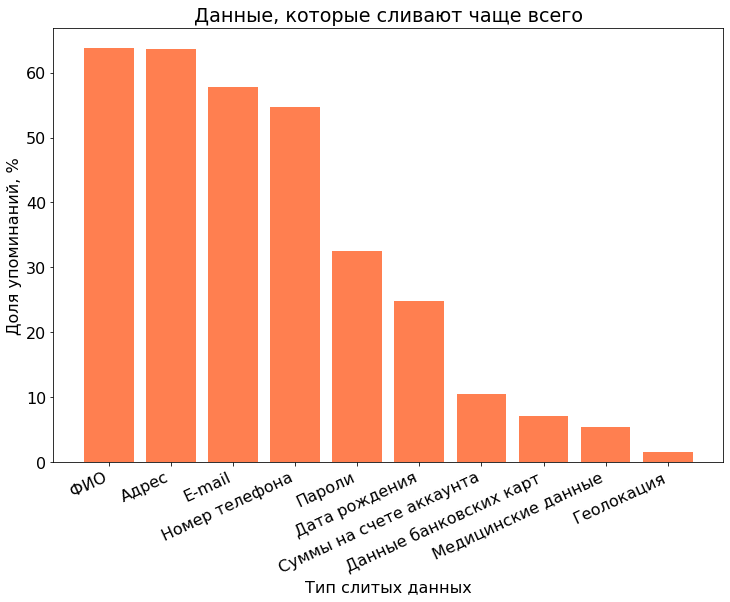

In [124]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(12, 8))

plt.title("Данные, которые сливают чаще всего")
plt.bar(df_to_viz.index, df_to_viz, color='#FF7F50')
plt.xticks(rotation=25, ha='right')

plt.xlabel("Тип слитых данных")
plt.ylabel('Доля упоминаний, %')
plt.show()



In [131]:
df_source = df_sorted['leak_sources']
df_source.fillna('Нет информации', inplace=True)
df_source.replace({'парсингом':'парсинг + компиляция'}, inplace=True)

In [132]:
df_source.head()

0    Нет информации
1    Нет информации
2    Нет информации
3    Нет информации
4    Нет информации
Name: leak_sources, dtype: object

In [133]:
df_source.value_counts()

Нет информации          450
хакерская атака          67
халатность               23
парсинг + компиляция      3
Name: leak_sources, dtype: int64

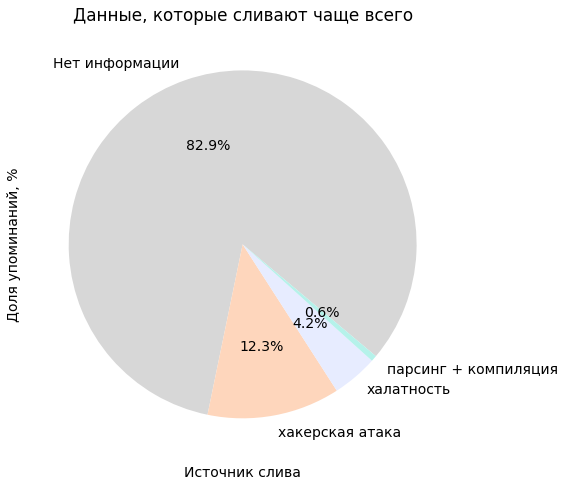

In [153]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 8))

plt.title("Данные, которые сливают чаще всего")
plt.pie(df_source.value_counts(), 
        labels = df_source.value_counts().index, 
        colors=['#d7d7d7', '#FED6BC', '#E7ECFF', '#B5F2EA'], 
       startangle = 320,
       autopct='%1.1f%%')

plt.xlabel("Источник слива")
plt.ylabel('Доля упоминаний, %')
plt.show()



In [157]:
df_channel = df_sorted['leak_chanell']
df_channel.fillna('Нет информации', inplace=True)


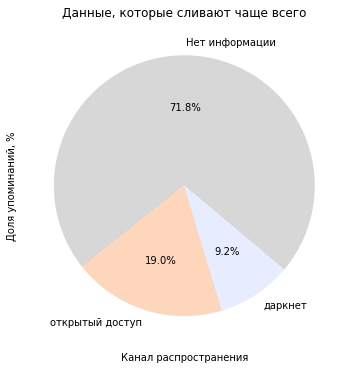

In [158]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10, 6))

plt.title("Данные, которые сливают чаще всего")
plt.pie(df_channel.value_counts(), 
        labels = df_channel.value_counts().index, 
        colors=['#d7d7d7', '#FED6BC', '#E7ECFF'], 
       startangle = 320,
       autopct='%1.1f%%')

plt.xlabel("Канал распространения")
plt.ylabel('Доля упоминаний, %')
plt.show()



In [160]:
df_final = df_sorted[['date', 'message_id']]
df_final['date'].dt.to_period('M'

In [186]:
df_final1 = df_final.groupby('date').agg({'message_id':'count'})


IndexError: too many indices for array

In [188]:
df_final1.columns = ['количество сливов']

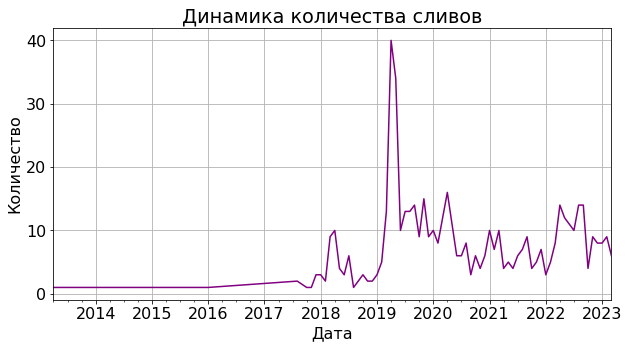

In [196]:
import matplotlib.pyplot as plt

df_final1.plot(kind='line', y='количество сливов', figsize=(10, 5), grid=True, color='purple', legend=False)

plt.xlabel('Дата')

plt.ylabel('Количество')
plt.title('Динамика количества сливов')
plt.show()


#### сохраняем в нужном формате

In [102]:
df_sorted.to_csv('dataleak_day_2_update.csv', sep=';', encoding='utf-8')

In [ ]:
df_sorted.to_excel('dataleak_new_table.xlsx')

In [ ]:
int('10000')